# Data Wrangling

### Import The Libraries, Load The Dataset & Wrangle it:

In [1]:
# Import the libraries
import warnings

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

warnings.simplefilter(action = "ignore", category = FutureWarning)

# Load the clean version of the dataset
# Assign to a dataframe
# Perform feature selection:
df_rainfall = pd.read_csv("austin_weather_clean.csv")
df_rainfall.drop(columns = ["DewPointHighF", "DewPointLowF"], inplace = True)

# Remove outliers from the data;
#'VisibilityHighMiles' column:
low, high = df_rainfall["VisibilityHighMiles"].quantile([0.01, 1])
mask_visibilityH = df_rainfall["VisibilityHighMiles"].between(low, high)
#'SeaLevelPressureAvgInches' column:
low, high = df_rainfall["SeaLevelPressureAvgInches"].quantile([0.25, 1])
mask_seaLevel = df_rainfall["SeaLevelPressureAvgInches"].between(low, high)

# Transform the dataframe:
df_rainfall = df_rainfall[mask_visibilityH & mask_seaLevel]

### Extract The Independent & Dependent Variables:

In [2]:
# The independent variables:
input_ds = df_rainfall.drop(columns = ["PrecipitationSumInches", "Unnamed: 0"])
# The dependent variable:
output_ds = df_rainfall["PrecipitationSumInches"]

# Exploratory Data Analysis

In [3]:
# Explore the dataframe; the first 10 rows
df_rainfall.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1,1,56,48,39,36.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.0
2,2,58,45,32,27.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.0
3,3,61,46,31,28.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.0
4,4,58,50,41,40.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.0
5,5,57,48,39,36.0,79.0,63.0,47.0,30.40,10.0,9.0,7.0,12.0,3.0,17.0,0.0


In [4]:
# Remove the unwanted column('Unnamed: 0):
df_rainfall.drop(columns = ["Unnamed: 0"], inplace = True)

In [5]:
# An overview of the dataframe:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1 to 1318
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempHighF                  1008 non-null   int64  
 1   TempAvgF                   1008 non-null   int64  
 2   TempLowF                   1008 non-null   int64  
 3   DewPointAvgF               1008 non-null   float64
 4   HumidityHighPercent        1008 non-null   float64
 5   HumidityAvgPercent         1008 non-null   float64
 6   HumidityLowPercent         1008 non-null   float64
 7   SeaLevelPressureAvgInches  1008 non-null   float64
 8   VisibilityHighMiles        1008 non-null   float64
 9   VisibilityAvgMiles         1008 non-null   float64
 10  VisibilityLowMiles         1008 non-null   float64
 11  WindHighMPH                1008 non-null   float64
 12  WindAvgMPH                 1008 non-null   float64
 13  WindGustMPH                1008 non-null   float64
 1

In [6]:
input_ds.shape

(1008, 14)

### Feature Distribution & Correlation:

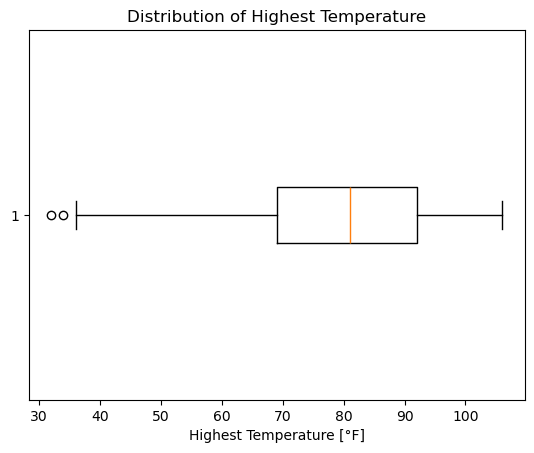

In [7]:
# Use a horizontal boxplot to check for outliers in the 'TempHighF' column:
plt.boxplot(df_rainfall["TempHighF"], vert = False)
plt.xlabel("Highest Temperature [°F]")
plt.title("Distribution of Highest Temperature");

In [ ]:
# Summary stats of 'TempHighF' feature:
df_rainfall["TempHighF"].describe()

,TempHighF
count,1008.000000
mean,79.078373
std,15.522569
min,32.000000
25%,69.000000
50%,81.000000
75%,92.000000
max,106.000000


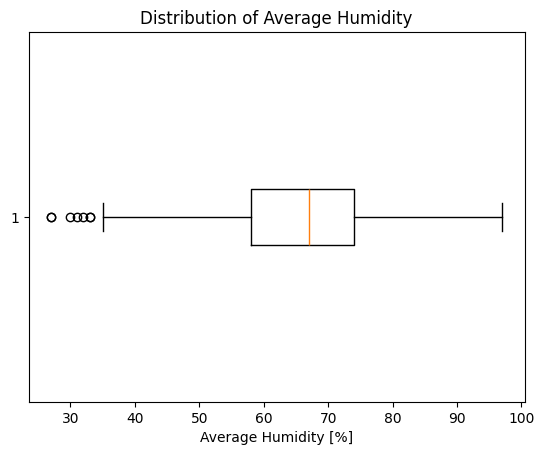

In [ ]:
# Use a horizontal boxplot to check for outliers in the 'HumidityAvgPercent' column:
plt.boxplot(df_rainfall["HumidityAvgPercent"], vert = False)
plt.xlabel("Average Humidity [%]")
plt.title("Distribution of Average Humidity");

In [ ]:
df_rainfall["HumidityAvgPercent"].describe()

,HumidityAvgPercent
count,1008.000000
mean,66.210317
std,12.755567
min,27.000000
25%,58.000000
50%,67.000000
75%,74.000000
max,97.000000


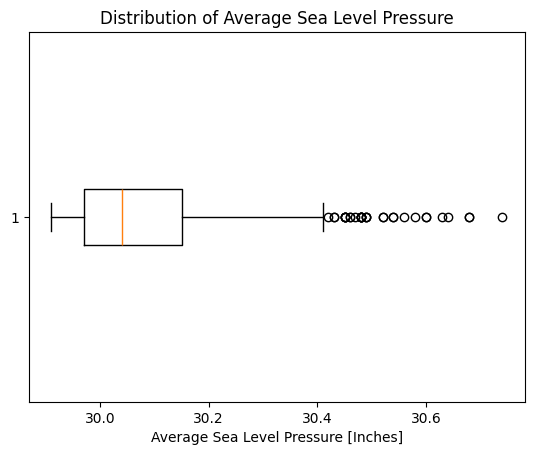

In [ ]:
# Use a horizontal boxplot to check for outliers in the 'SeaLevelPressureAvgInches' column:
plt.boxplot(df_rainfall["SeaLevelPressureAvgInches"], vert = False)
plt.xlabel("Average Sea Level Pressure [Inches]")
plt.title("Distribution of Average Sea Level Pressure");

In [ ]:
df_rainfall["SeaLevelPressureAvgInches"].describe()

,SeaLevelPressureAvgInches
count,1008.000000
mean,30.081349
std,0.146358
min,29.910000
25%,29.970000
50%,30.040000
75%,30.150000
max,30.740000


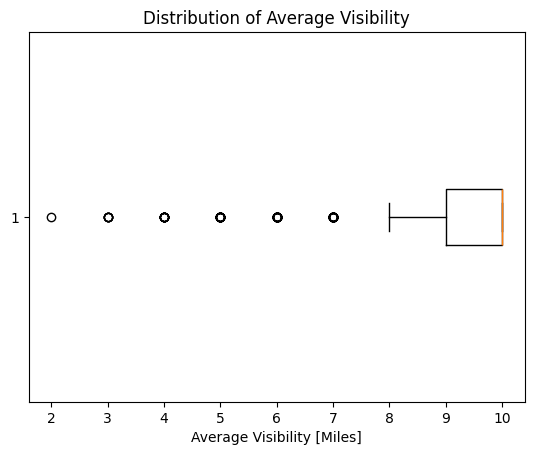

In [ ]:
# Use a horizontal boxplot to check for outliers in the 'VisibilityAvgMiles' column:
plt.boxplot(df_rainfall["VisibilityAvgMiles"], vert = False)
plt.xlabel("Average Visibility [Miles]")
plt.title("Distribution of Average Visibility");

In [ ]:
df_rainfall["VisibilityAvgMiles"].describe()

,VisibilityAvgMiles
count,1008.000000
mean,9.230159
std,1.435333
min,2.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,10.000000


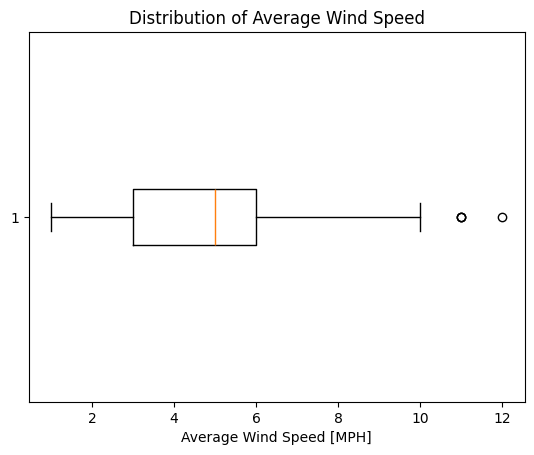

In [ ]:
# Use a horizontal boxplot to check for outliers in the 'WindAvgMPH' column:
plt.boxplot(df_rainfall["WindAvgMPH"], vert = False)
plt.xlabel("Average Wind Speed [MPH]")
plt.title("Distribution of Average Wind Speed");

In [ ]:
df_rainfall["WindAvgMPH"].describe()

,WindAvgMPH
count,1008.000000
mean,4.767857
std,2.029494
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,12.000000


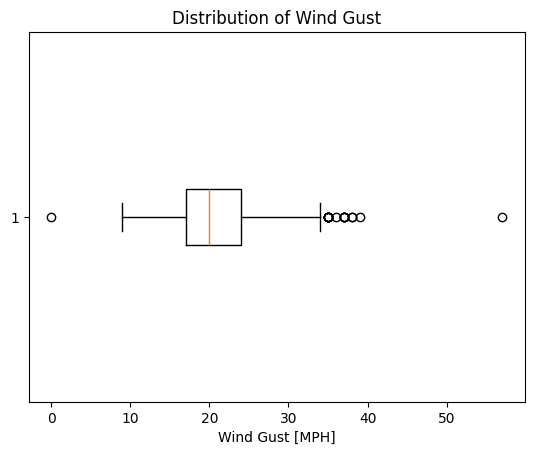

In [ ]:
# Use a horizontal boxplot to check for outliers in the 'WindGustMPH' column:
plt.boxplot(df_rainfall["WindGustMPH"], vert = False)
plt.xlabel("Wind Gust [MPH]")
plt.title("Distribution of Wind Gust");

In [ ]:
df_rainfall["WindGustMPH"].describe()

,WindGustMPH
count,1008.000000
mean,20.609127
std,5.677006
min,0.000000
25%,17.000000
50%,20.000000
75%,24.000000
max,57.000000


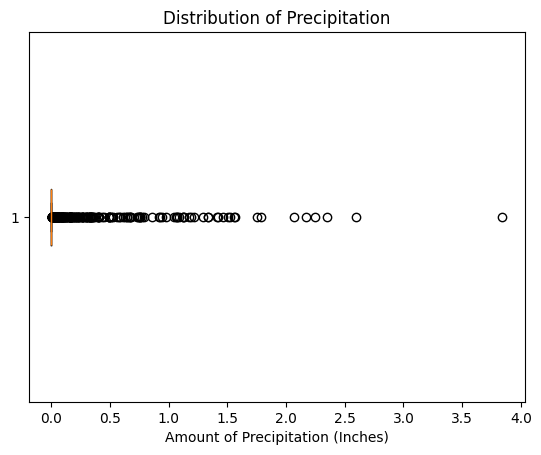

In [ ]:
# Use a horizontal boxplot to check for outliers in the 'PrecipitationSumInches' column:
plt.boxplot(df_rainfall["PrecipitationSumInches"], vert = False)
plt.xlabel("Amount of Precipitation (Inches)")
plt.title("Distribution of Precipitation");

In [ ]:
# Summary stats of 'PrecipitationSumInches' attribute:
df_rainfall["PrecipitationSumInches"].describe()

,PrecipitationSumInches
count,1008.000000
mean,0.087073
std,0.306352
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.840000


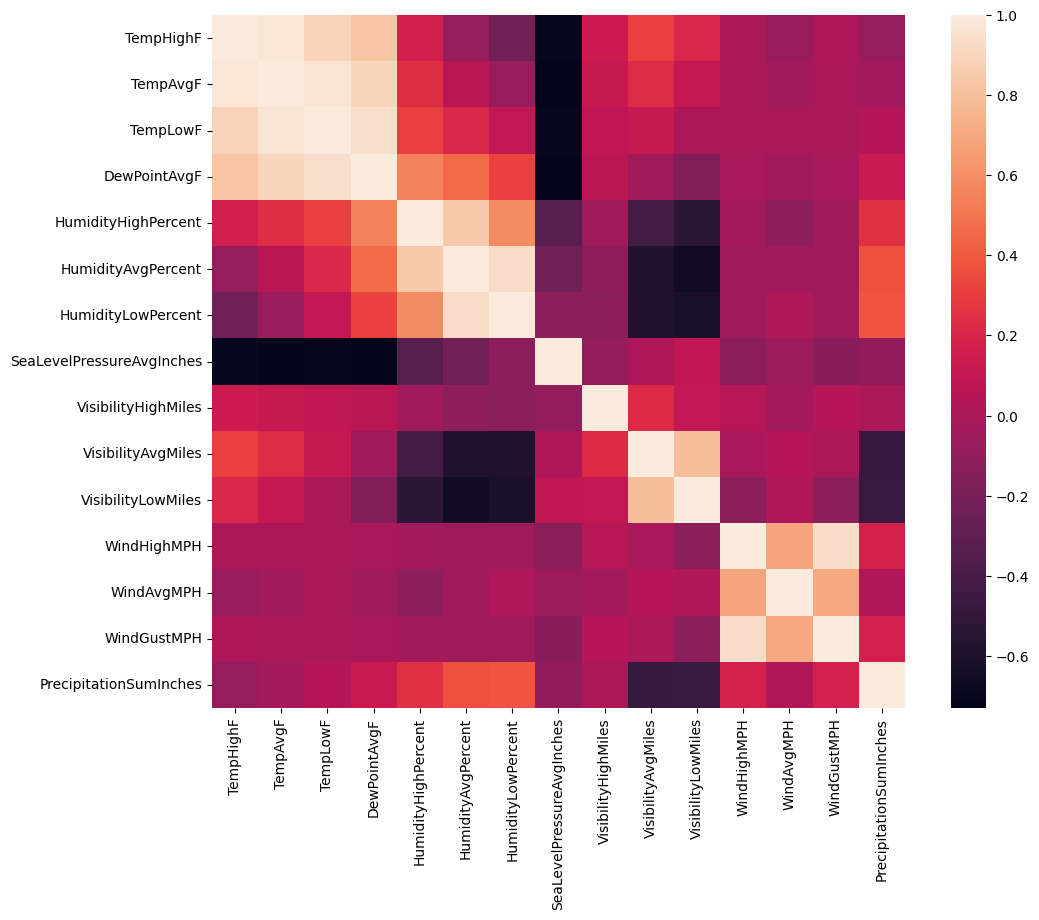

In [ ]:
# Correlation matrix.
# Shows the relationship between the dependent variables and the independent variable:
corrmatrix = df_rainfall.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.show()

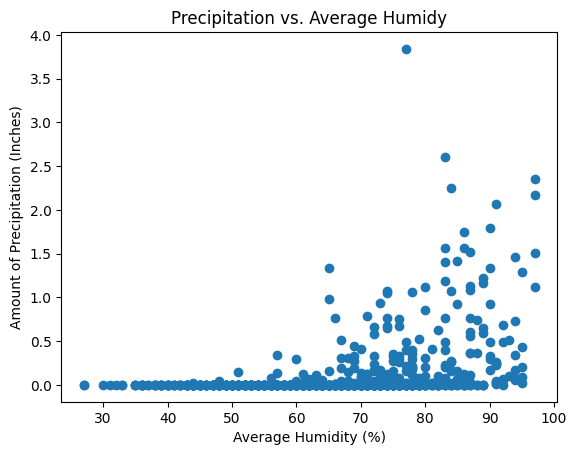

In [ ]:
# Create a scatterplot to test if 'HumidityAvgPercent' influences the amount of precipitation:
plt.scatter(df_rainfall["HumidityAvgPercent"], df_rainfall["PrecipitationSumInches"])
plt.xlabel("Average Humidity (%)")
plt.ylabel("Amount of Precipitation (Inches)")
plt.title("Precipitation vs. Average Humidy");

In [ ]:
# The Pearson correlation coefficient of 'PrecipitationSumInches' and 'HumidityAvgPercent':
p_correlation = df_rainfall["HumidityAvgPercent"].corr(df_rainfall["PrecipitationSumInches"])
print("The Pearson correlation coefficient is: ", p_correlation)

The Pearson correlation coefficient is:  0.3681990786463324


# Training & Test Splitting Data

In [ ]:
# Dataset summary:
print(input_ds.shape, output_ds.shape)

(1008, 14) (1008,)


In [ ]:
# Split into train and test sets:
input_train, input_test, output_train, output_test = train_test_split(input_ds, output_ds, test_size = 0.2, random_state = 42)

print("input train: ", input_train.shape)
print("\ninput test: ", input_test.shape)
print("\noutput train: ", output_train.shape)
print("\noutput test: ", output_test.shape)

input train:  (806, 14)

input test:  (202, 14)

output train:  (806,)

output test:  (202,)


In [ ]:
# Standardize the training and test set:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

In [ ]:
# Print the first 2 rows of the 'input_train' 2D array:
print(input_train[:2])

[[-1.05255844 -1.23480713 -1.38764384 -2.05959806 -2.63694306 -2.23259463
  -1.56512579  1.58762965  0.05761512  0.54358645  0.83061291  0.67215627
   0.62588596  0.78520543]
 [-1.69273509 -1.23480713 -0.7194392  -0.72643975  0.77073194  0.68428437
   0.54127174  0.425014    0.05761512 -0.90477943 -1.39447727  0.67215627
  -0.36520261  0.25233236]]


# Machine Learning Algorithms

## Baseline Model

In [ ]:
y_train_mean = output_train.mean()
y_pred_baseline = [y_train_mean] * len(output_train)
mae_baseline = mean_absolute_error(output_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(output_train, y_pred_baseline))
print("Mean precipitation level is: ", round(y_train_mean, 2))
print("Baseline MAE is: ", round(mae_baseline, 2))
print("Baseline RMSE is: ", round(rmse_baseline, 2))

Mean precipitation level is:  0.09
Baseline MAE is:  0.14
Baseline RMSE is:  0.3


## Select & Train a Model

## 1. Multivariate Linear Regression (MLR)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a linear regression model and train it
model = LinearRegression()
model.fit(input_train, output_train)

# Calculating the intercept and coefficient
print("The intercept is:", model.intercept_, "\n")
print("The coefficient is:", model.coef_, "\n")

# Make predictions
predictions_lr = model.predict(input_train)

# Evaluate the model on the training set
# The Mean Absolute Error
mae_training = mean_absolute_error(output_train, predictions_lr)
print("The training MAE is:", round(mae_training, 2), "\n")

# The Accuracy of the model
acc_mlr = r2_score(output_train, predictions_lr) * 100
print("The training Accuracy is:", round(acc_mlr, 2), "%\n")

# The Root Mean Squared Error
scores = cross_val_score(model, input_train, output_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

# Display RMSE results
def display_scores(scores):
    print("Scores RMSE:", scores, "\n")
    print("Standard deviation:", scores.std(), "\n")
    print("Mean RMSE is:", round(scores.mean(), 2), "\n")

display_scores(rmse_scores)


The intercept is: 0.08528535980148888 

The coefficient is: [ 0.24571219 -0.33747861  0.31965307 -0.22037346  0.12773646 -0.25306266
  0.27313453 -0.00437155  0.02615958 -0.10718213 -0.02063717  0.07573155
 -0.07114171  0.02975905] 

The training MAE is: 0.12 

The training Accuracy is: 32.72 %

Scores RMSE: [0.2380799  0.20186494 0.18686664 0.37246955 0.2041969  0.17203585
 0.45722685 0.16922172 0.19475157 0.17712903] 

Standard deviation: 0.09266019734473512 

Mean RMSE is: 0.24 



## 2. KNeighbors Regressor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a KNeighbors Regression model and train it
kn_reg = KNeighborsRegressor(n_neighbors=2)
kn_reg.fit(input_train, output_train)

# Make predictions
predictions_knn = kn_reg.predict(input_train)

# Evaluate the model on the training set
# The Mean Absolute Error
mae_training = mean_absolute_error(output_train, predictions_knn)
print("The training MAE is:", round(mae_training, 2), "\n")

# The Accuracy of the model in percentage
acc_knn = r2_score(output_train, predictions_knn) * 100
print("The training Accuracy is:", round(acc_knn, 2), "%\n")

# The Root Mean Squared Error
scores = cross_val_score(kn_reg, input_train, output_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

# Display RMSE results
def display_scores(scores):
    print("Scores RMSE:", scores, "\n")
    print("Standard deviation:", scores.std(), "\n")
    print("Mean RMSE is:", round(scores.mean(), 2), "\n")

display_scores(rmse_scores)


The training MAE is: 0.04 

The training Accuracy is: 77.52 %

Scores RMSE: [0.23882557 0.24624025 0.15695993 0.33372616 0.34425443 0.23153074
 0.36634768 0.18402615 0.1782642  0.17060737] 

Standard deviation: 0.07357095109061319 

Mean RMSE is: 0.25 



## 3. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Random Forest Regressor model and train it
forest_reg = RandomForestRegressor()
forest_reg.fit(input_train, output_train)

# Make predictions
predictions_forest = forest_reg.predict(input_train)

# Evaluate the model on the training set
# The Mean Absolute Error
mae_training = mean_absolute_error(output_train, predictions_forest)
print("The training MAE is:", round(mae_training, 2), "\n")

# The Accuracy of the model
acc_rf = r2_score(output_train, predictions_forest) * 100
print("The training Accuracy is:", round(acc_rf, 2), "%\n")

# The Root Mean Squared Error
scores = cross_val_score(forest_reg, input_train, output_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

# Display RMSE results
def display_scores(scores):
    print("Scores RMSE:", scores, "\n")
    print("Standard deviation:", scores.std(), "\n")
    print("Mean RMSE is:", round(scores.mean(), 2), "\n")

display_scores(rmse_scores)


The training MAE is: 0.03 

The training Accuracy is: 90.68 %

Scores RMSE: [0.22940556 0.18752437 0.21494814 0.30977258 0.26031572 0.1805626
 0.42713937 0.12214398 0.23608667 0.12832896] 

Standard deviation: 0.0852216719394193 

Mean RMSE is: 0.23 



## 4. Support Vector Machines

### Testing Different Parameters:

### Parameter 1 (kernel = "linear")

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Support Vector Regressor model and train it
regressor_linear = SVR(kernel="linear")
regressor_linear.fit(input_train, output_train)

# Make predictions
predictions_svr_l = regressor_linear.predict(input_train)

# Evaluate the model on the training set
# The Mean Absolute Error
mae_training = mean_absolute_error(output_train, predictions_svr_l)
print("The training MAE is:", round(mae_training, 2), "\n")

# The R^2 Score (Accuracy of the model)
acc_svm = r2_score(output_train, predictions_svr_l) * 100
print("The training Accuracy is:", round(acc_svm, 2), "%\n")

# The Root Mean Squared Error
scores = cross_val_score(regressor_linear, input_train, output_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

# Display RMSE results
def display_scores(scores):
    print("Scores RMSE:", scores, "\n")
    print("Standard deviation:", scores.std(), "\n")
    print("Mean RMSE is:", round(scores.mean(), 2), "\n")

display_scores(rmse_scores)


The training MAE is: 0.11 

The training Accuracy is: 21.9 %

Scores RMSE: [0.25175962 0.17643558 0.1997258  0.41529319 0.18913161 0.17780183
 0.48623003 0.17697073 0.20984416 0.16589841] 

Standard deviation: 0.10665176354804083 

Mean RMSE is: 0.24 



### Parameter 2 (kernel = "rbf")

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Support Vector Regressor model with RBF kernel and train it
regressor_rbf = SVR(kernel="rbf")
regressor_rbf.fit(input_train, output_train)

# Make predictions
predictions_svr_r = regressor_rbf.predict(input_train)

# Evaluate the model on the training set
# The Mean Absolute Error
mae_training = mean_absolute_error(output_train, predictions_svr_r)
print("The training MAE is:", round(mae_training, 2), "\n")

# The R^2 Score (Accuracy of the model)
acc_svm_rbf = r2_score(output_train, predictions_svr_r) * 100
print("The training Accuracy is:", round(acc_svm_rbf, 2), "%\n")

# The Root Mean Squared Error
scores = cross_val_score(regressor_rbf, input_train, output_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

# Display RMSE results
def display_scores(scores):
    print("Scores RMSE:", scores, "\n")
    print("Standard deviation:", scores.std(), "\n")
    print("Mean RMSE is:", round(scores.mean(), 2), "\n")

display_scores(rmse_scores)


The training MAE is: 0.09 

The training Accuracy is: 61.08 %

Scores RMSE: [0.21991073 0.17131496 0.1580901  0.32496973 0.1814094  0.16502927
 0.41999116 0.13791165 0.18816222 0.13328967] 

Standard deviation: 0.08717889593176742 

Mean RMSE is: 0.21 



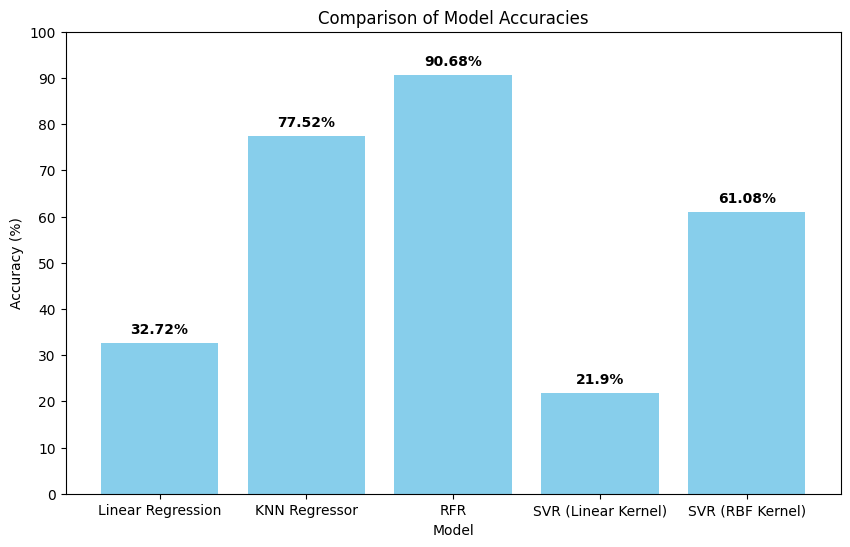

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and their respective accuracies (R^2 scores)
model_names = [
    "Linear Regression",
    "KNN Regressor",
    "SAIRMA",
    "SVR (Linear Kernel)",
    "SVR (RBF Kernel)"
]

# Replace these values with the actual R^2 scores from each model's evaluation
model_accuracies = [
    acc_mlr,
    acc_knn,
    acc_rf,
    acc_svm,
    acc_svm_rbf
]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 100)  # Set the limit to 100% for better visualization

# Set the y-axis ticks to range from 0 to 100 with steps of 10
plt.yticks(range(0, 101, 10))

# Display values above each bar
for i, v in enumerate(model_accuracies):
    plt.text(i, v + 2, f"{round(v, 2)}%", ha='center', fontweight='bold')

plt.show()
